In [1]:
import pandas as pd ;
import seaborn as sns ;
import numpy as np ;
import matplotlib.pyplot as plt ;

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [5]:
data.drop(["CustomerID" , "Genre","Age" ] ,inplace=True , axis = 1);

In [6]:
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
data.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True);
data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

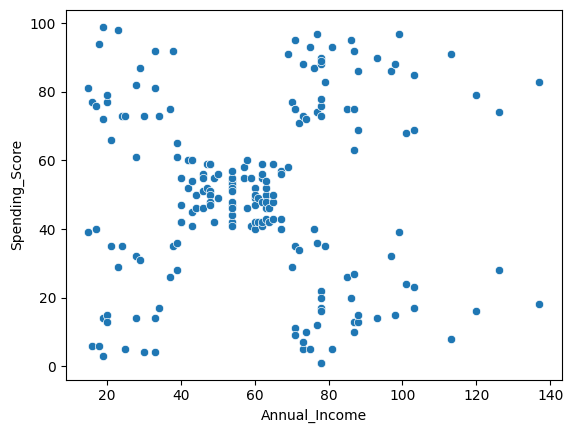

In [8]:
sns.scatterplot(data , x='Annual_Income' , y='Spending_Score')

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering
kmean1 = KMeans(n_clusters =3 ,random_state= 0)
kmean1

KMeans(n_clusters=3, random_state=0)

In [10]:
kmean1.fit(data)

KMeans(n_clusters=3, random_state=0)

In [11]:
Centroids_1 = kmean1.cluster_centers_
Centroids_1

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

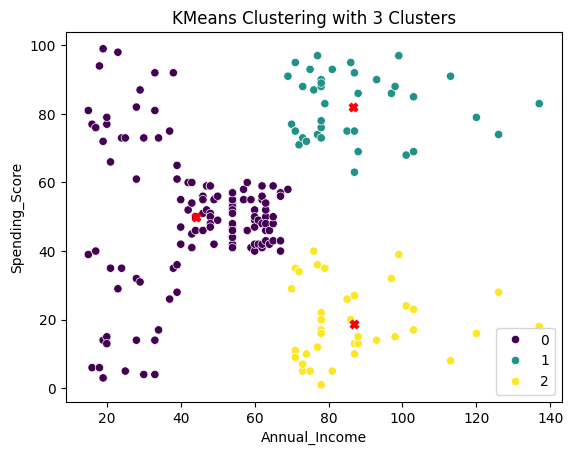

In [29]:

sns.scatterplot(data , x='Annual_Income' , y='Spending_Score', hue=kmean1.labels_ , palette ='viridis' )
plt.scatter(Centroids_1[:,0] ,Centroids_1[:,1], c='red',marker='X' , label = "Centroid")
plt.title("KMeans Clustering with 3 Clusters")
plt.show()

In [13]:
inertia_values = {}
for k in range(1 , 10):
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(data)
    inertia_values[k]=kmean.inertia_

In [14]:
inertia_values

{1: 269981.28,
 2: 185917.1425392852,
 3: 106348.37306211122,
 4: 73679.78903948836,
 5: 44448.4554479337,
 6: 38858.959975143895,
 7: 31969.42655023547,
 8: 29858.483597603947,
 9: 22209.851608025543}

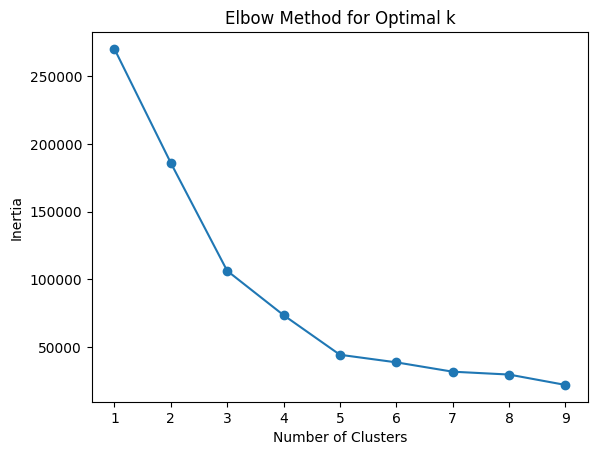

In [15]:
plt.plot(list(inertia_values.keys()),list(inertia_values.values()) ,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [16]:
kmean2 = KMeans(n_clusters=5, random_state=0)

In [17]:
kmean2.fit(data)

KMeans(n_clusters=5, random_state=0)

In [18]:
centroids_2 = kmean2.cluster_centers_
centroids_2 

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

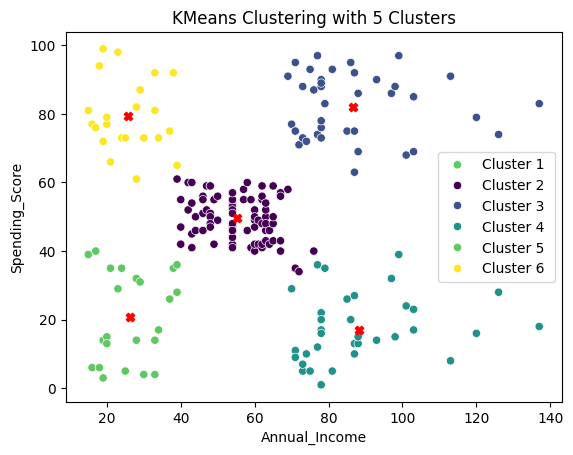

In [19]:
sns.scatterplot(data, x='Annual_Income', y='Spending_Score', hue=kmean2.labels_, palette='viridis')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='red', marker='X')
plt.title("KMeans Clustering with 5 Clusters")
plt.legend(["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6 "])
plt.show()

In [20]:
from scipy.cluster.hierarchy import dendrogram , linkage 
agglo_cluster = AgglomerativeClustering(n_clusters=5 , linkage='ward' ,metric='euclidean')


In [21]:
agglo_cluster.fit(data)

AgglomerativeClustering(n_clusters=5)

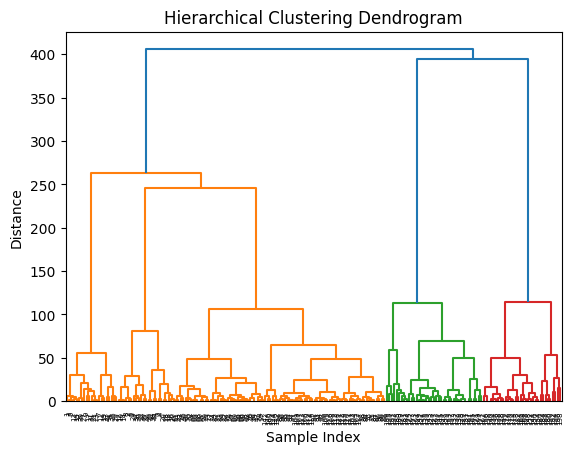

In [22]:
linkage_matrix = linkage(data,method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()